##############

**AULA 1**

##############

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('databases/data01.csv')
origin1 = df[['d1', 'd2']].to_numpy()

df_auto = pd.read_csv('databases/auto-mpg.csv')
print (df_auto.describe())
origin2 = df_auto[['horsepower', 'mpg']].to_numpy()

             mpg   cylinders  displacement  horsepower       weight  \
count  408.00000  408.000000    408.000000  408.000000   408.000000   
mean    23.32598    5.468137    194.283088  104.649510  2975.139706   
std      7.86927    1.711061    104.903976   38.724151   847.119184   
min     10.00000    3.000000     68.000000   46.000000  1613.000000   
25%     17.00000    4.000000    103.250000   75.000000  2222.250000   
50%     23.00000    4.000000    148.500000   95.000000  2811.000000   
75%     29.00000    8.000000    302.000000  129.000000  3614.750000   
max     44.00000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year      origin  
count    408.000000  408.000000  408.000000  
mean      15.557108   75.946078    1.571078  
std        2.848725    3.756996    0.796088  
min        8.000000   70.000000    1.000000  
25%       13.700000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.225000   79.000000    2.0

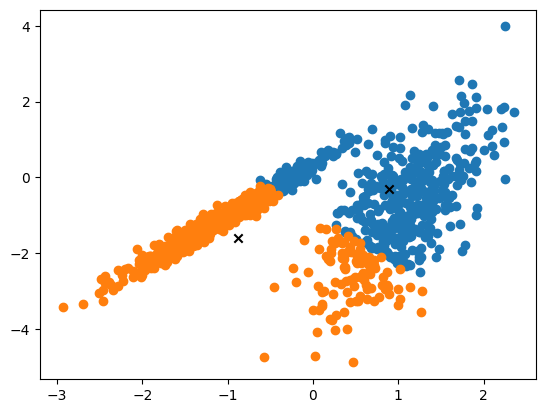

In [3]:
# ATIVIDADE 1
k = 2
X = origin1
# KMeans
kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(X)
for i, class_value in enumerate(range(k)):
    row_ids = np.where(kmeans.labels_ == class_value)
    sc = plt.scatter(X[row_ids, 0], X[row_ids, 1])
    color = sc.get_facecolors()[0].tolist()
    plt.scatter(kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1], color='black', marker='x')
plt.show()

In [4]:
from sklearn_extra.cluster import KMedoids

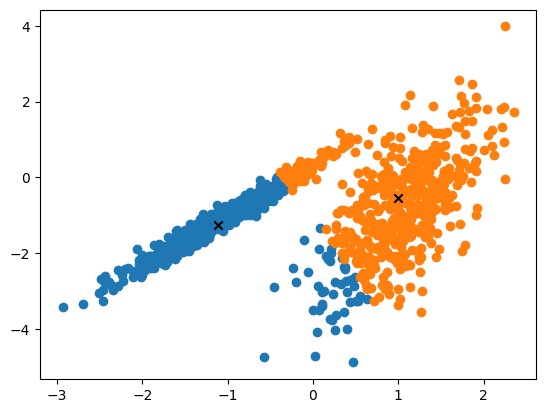

In [5]:
## KMedoids
kmedoids = KMedoids(n_clusters=k, random_state=0).fit(X)
for i, class_value in enumerate(range(k)):
    row_ids = np.where(kmedoids.labels_ == class_value)
    sc = plt.scatter(X[row_ids, 0], X[row_ids, 1])
    color = sc.get_facecolors()[0].tolist()
    plt.scatter(kmedoids.cluster_centers_[i][0], kmedoids.cluster_centers_[i][1], color='black', marker='x')
plt.show()

##############

**AULA 2**

##############

In [6]:
# ATIVIDADE 2.A
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch

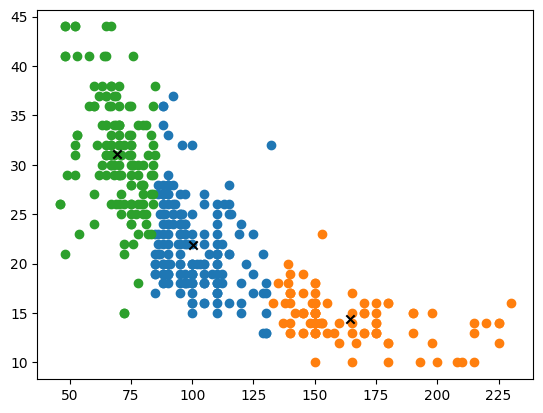

In [7]:
# KMeans
k = 3
X = origin2

kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(X)
for i, class_value in enumerate(range(k)):
    row_ids = np.where(kmeans.labels_ == class_value)
    sc = plt.scatter(X[row_ids, 0], X[row_ids, 1])
    color = sc.get_facecolors()[0].tolist()
    plt.scatter(kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1], color='black', marker='x')
plt.show()

c:\Users\willi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:275: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(


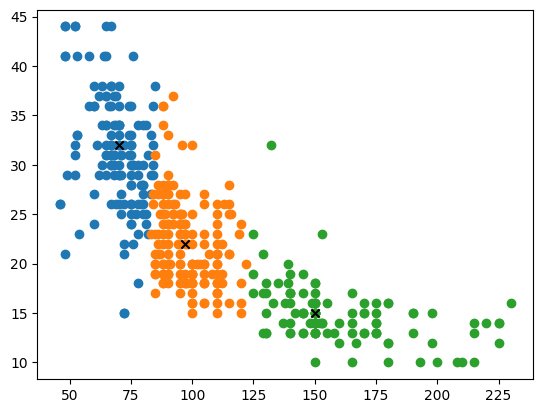

In [8]:
## KMedoids
k = 3
X = origin2

kmedoids = KMedoids(n_clusters=k, random_state=0).fit(X)
for i, class_value in enumerate(range(k)):
    row_ids = np.where(kmedoids.labels_ == class_value)
    sc = plt.scatter(X[row_ids, 0], X[row_ids, 1])
    color = sc.get_facecolors()[0].tolist()
    plt.scatter(kmedoids.cluster_centers_[i][0], kmedoids.cluster_centers_[i][1], color='black', marker='x')
plt.show()

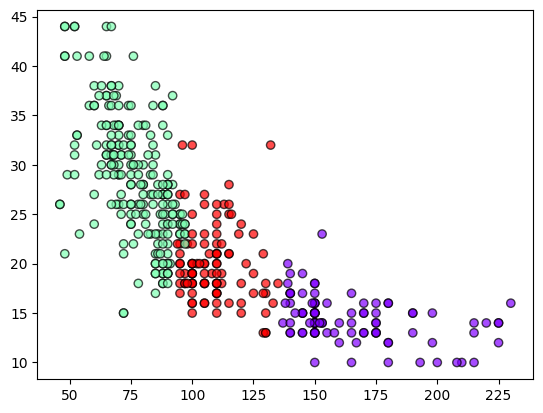

In [9]:
# Birch
k = 3
X = origin2
brc = Birch(branching_factor = 60, n_clusters=k, threshold = 1.5).fit(X)

plt.scatter(X[:,0], X[:,1], c=brc.labels_, cmap='rainbow', alpha=0.7, edgecolors='black')
plt.show()

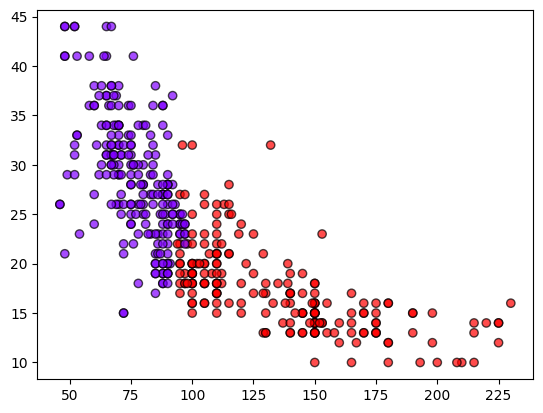

In [10]:
# Birch + Agglomerative
k = 3
X = origin2
brc = Birch(branching_factor = 60, n_clusters=k, threshold = 1.5).fit(X)

agg = AgglomerativeClustering(n_clusters=k)
subcluster_labels = agg.fit_predict(brc.subcluster_centers_)
labels = [subcluster_labels[i] for i in brc.labels_]

plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow', alpha=0.7, edgecolors='black')
plt.show()

In [11]:
# ATIVIDADE 2.B
from sklearn.cluster import DBSCAN

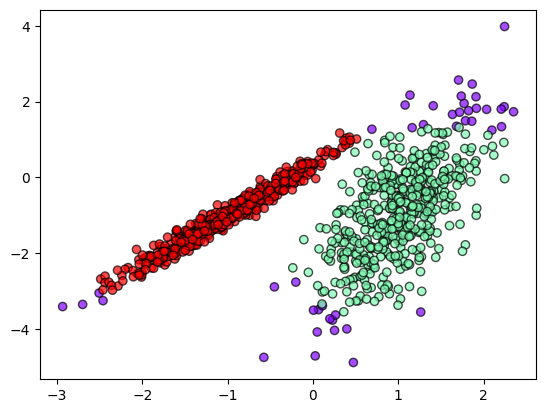

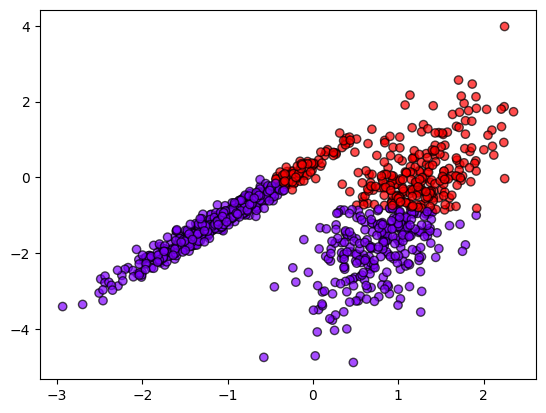

In [12]:
# DBScan
X = origin1
clustering = DBSCAN(eps=0.5, min_samples=30).fit(X)
plt.scatter(X[:,0], X[:,1], c=clustering.labels_, cmap='rainbow', alpha=0.7, edgecolors='black')
plt.show()

# Birch
brc = Birch(branching_factor = 10, n_clusters=2, threshold = 1.5).fit(X)
plt.scatter(X[:,0], X[:,1], c=brc.labels_, cmap='rainbow', alpha=0.7, edgecolors='black')
plt.show()

##############

**AULA 3**

##############

In [13]:
# ATIVIDADE 3.A
from sklearn import datasets
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

c:\Users\willi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\willi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\willi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\willi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

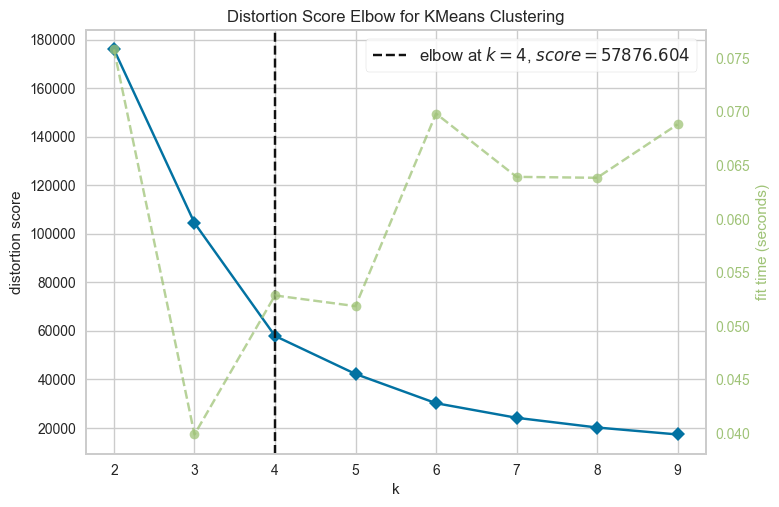

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
# KMeans
X = origin2

km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))

visualizer.fit(X)
visualizer.show()

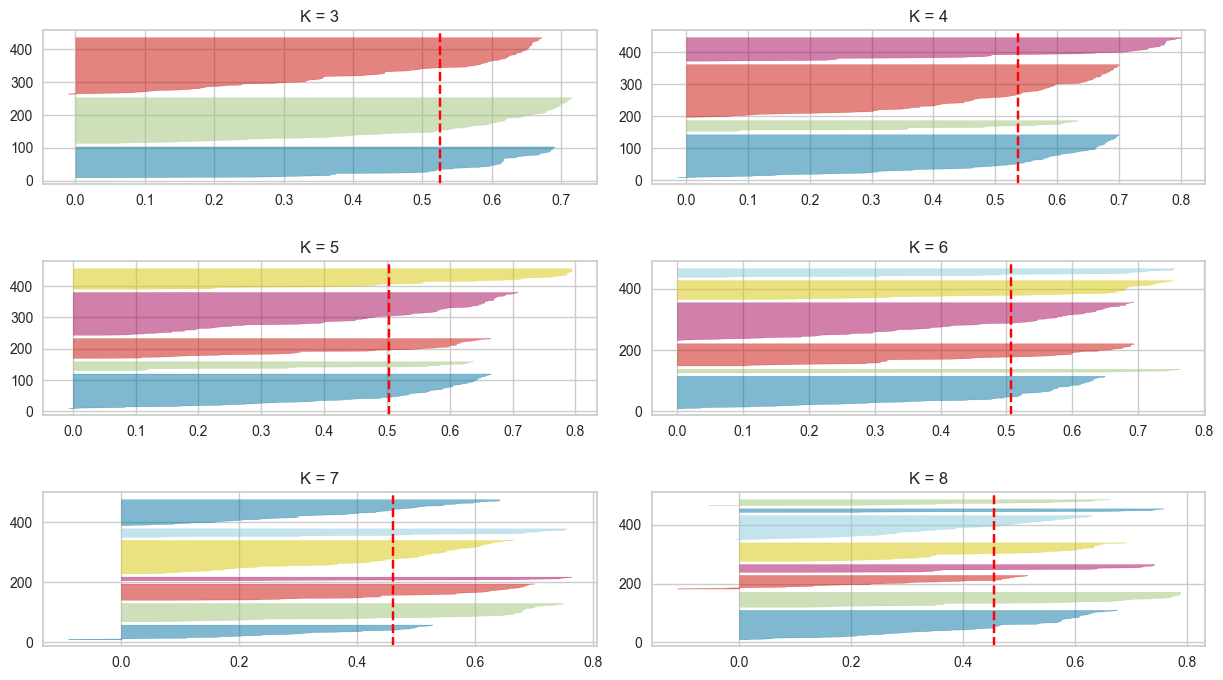

In [15]:
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i, k in enumerate([3, 4, 5, 6, 7, 8]):
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q][mod])
    ax[q][mod].set_title("K = " + str(k))
    ax[q][mod].set_adjustable
    visualizer.fit(X)

#visualizer.show()
fig.subplots_adjust(hspace=0.5, wspace=0.1)
plt.show()

c:\Users\willi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:275: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
c:\Users\willi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:275: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
c:\Users\willi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:275: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
c:\Users\willi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:275: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cl

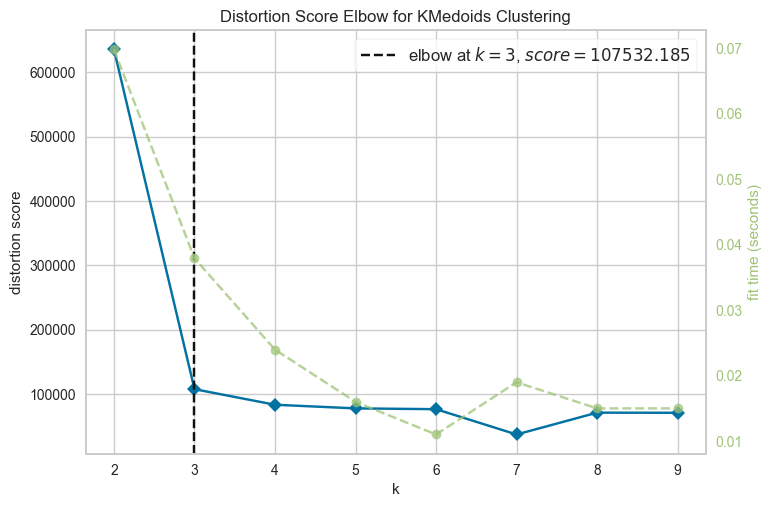

<Axes: title={'center': 'Distortion Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
# KMedoids
X = origin2
kmedoids = KMedoids(random_state=42)
visualizer = KElbowVisualizer(kmedoids, k=(2,10))

visualizer.fit(X)
visualizer.show()

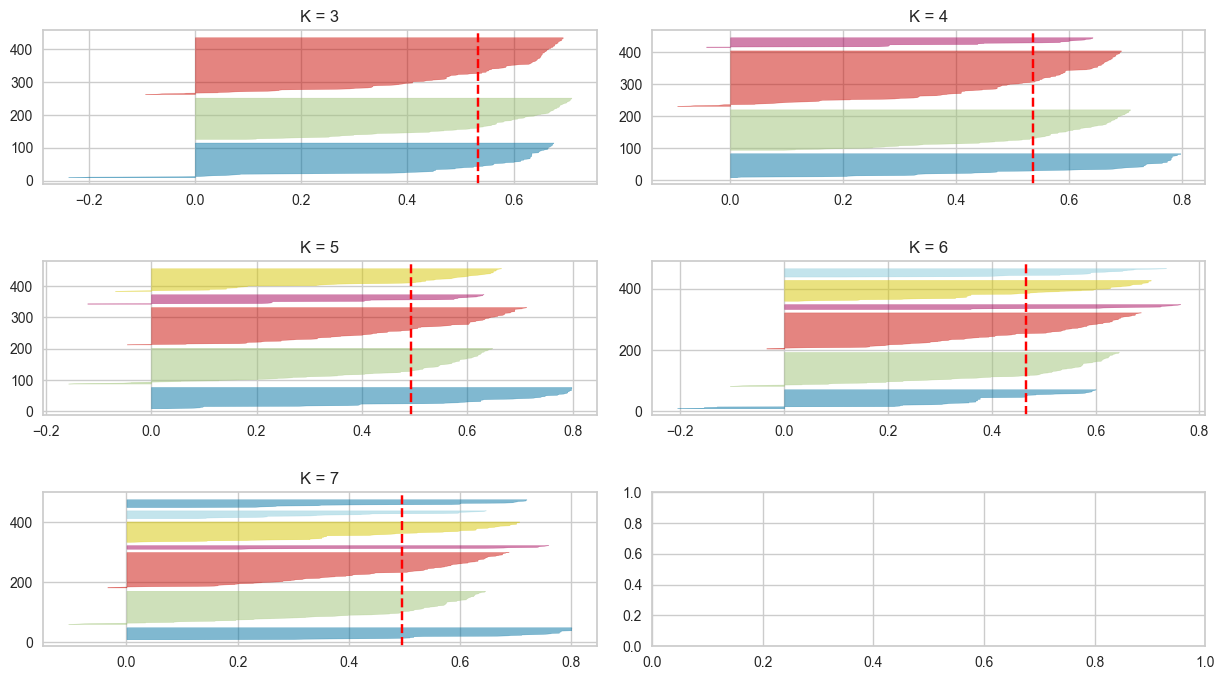

In [17]:
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i, k in enumerate([3, 4, 5, 6, 7]):
    kmedoids = KMedoids(n_clusters=k, init='k-medoids++', max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(kmedoids, colors='yellowbrick', ax=ax[q][mod])
    ax[q][mod].set_title("K = " + str(k))
    visualizer.fit(X)

#visualizer.show()
fig.subplots_adjust(hspace=0.5, wspace=0.1)
plt.show()

In [18]:
# ATIVIDADE 3.B
#from fuzzy import FuzzyKMeans
#from fuzzy import KMeans as fkm
import fuzzy

KMEANS
[[161  14]
 [ 98  22]
 [ 68  31]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 1 2 1 1 1 1 2 2 2 2 2 2 1 2 2 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 2 1 2 1 1 1 2 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 0 0 0 0 1 1 2 1 1
 1 1 1 0 0 2 2 1 1 0 1 1 0 1 1 1 2 2 2 2 1 1 1 0 0 0 0 0 2 2 2 2 2 2 2 2 1
 1 2 1 1 2 2 0 0 0 0 1 1 1 1 1 1 0 2 1 1 2 1 2 1 1 2 1 1 1 1 1 2 1 2 1 2 2
 0 0 1 0 1 1 2 1 2 2 2 2 1 2 1 1 2 2 2 2 1 0 1 1 1 0 0 0 0 2 2 2 1 2 0 1 0
 0 1 1 1 1 0 0 0 0 2 1 2 1 2 2 2 2 1 1 1 2 2 2 2 2 1 0 0 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 2 1 1 2 1 1 1 1 1 1 1 0 2 2 1 1 1 1 1 0 1 0 0 0 0 1 0 2 2 2 2 2
 1 2 1 2 2 2 2 1 1 1 1 2 2 2 2 1 1 1 1 2 1 2 1 2 2 1 2 2 2 2 2 2 2 2 2 0 1
 1 2 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 2 2 2 2 1 2 2 2 2 2 1 2 1 1 1 2 1 1 2 2 2 2 2 1 0 0 0 0 0 2 1 1 1 2 1 2
 1]
FUZZY KMEANS
[[101.64919913  21.43020642]
 [ 70.59527073  30.89538006]
 [164.06770855  14.35041667]]
[[5.25874876e-01 1.15020756e-

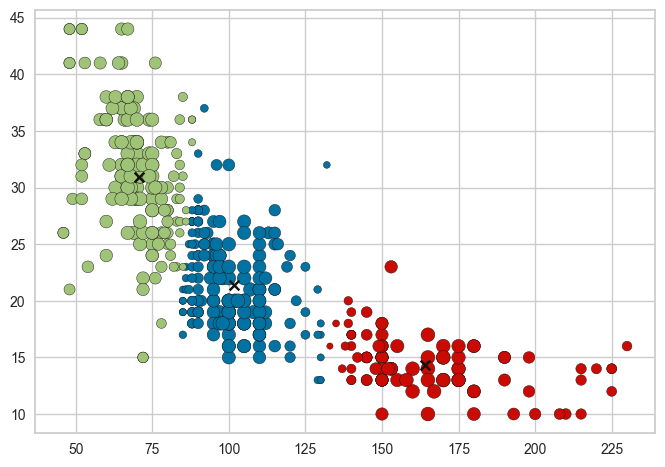

In [19]:
X = origin2

kmeans = fuzzy.KMeans(k=3)
kmeans.fit(X)

fuzzy_kmeans = fuzzy.FuzzyKMeans(k=3, m=2)
fuzzy_kmeans.fit(X)

# Code by Luciano Semicheche
for i in range(3):
    row = np.where(fuzzy_kmeans.labels_ == i)
    s = (10 * fuzzy_kmeans.fuzzy_labels_[row, i])**2
    sc = plt.scatter(X[row, 0], X[row, 1], edgecolor='k', s=s)
    color = sc.get_facecolors()[0].tolist()
    plt.scatter(fuzzy_kmeans.cluster_centers_[i][0],fuzzy_kmeans.cluster_centers_[i][1],color='k', marker='x')

print('KMEANS')
print(kmeans.cluster_centers_)

print(kmeans.labels_)

print('FUZZY KMEANS')
print(fuzzy_kmeans.cluster_centers_)

print(fuzzy_kmeans.fuzzy_labels_)
print(fuzzy_kmeans.labels_)